## Instructions
------------
 
This file contains code that helps you get started on the logistic regression exercise. You will need to complete the following functions in this exericse:

* sigmoid.m
* costFunction.m
* predict.m
* costFunctionReg.m

<hr>

## Part 1: Loading and Plotting Data
---

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.
Number of Training Examples:  118


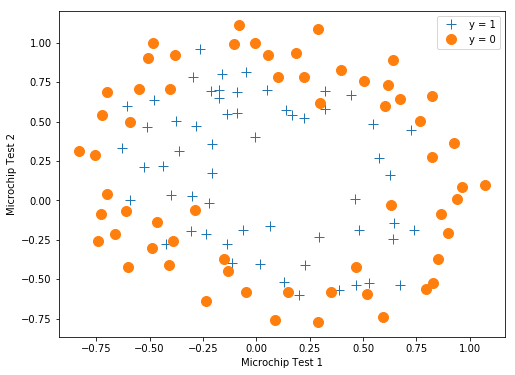

In [358]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

data = pd.read_csv('ex2data2.txt', sep=",", header=None)

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
m = len(y) # number of training examples

print('Number of Training Examples: ', m)

#Plot Data
fig = plt.figure(figsize=(8, 6))
plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker='+',\
         markersize=10, linewidth=0, label='y = 1')
plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker='o',\
         markersize=10, linewidth=0, label='y = 0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()

<hr>

## Part 1: Regularized Logistic Regression
---

In [467]:
# Compute Sigmoid
def sigmoid(z):
    """
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    """
    g = np.zeros([z.shape[0], 1])
    g = np.divide(1, (1 + np.exp(-z)))

    return g

In [526]:
# Calculate Regularized Cost
def costFunctionReg(theta, X, y, lamb):
    """
    COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters. 
    """
    
    # Initialize some useful values
    m = len(y) # number of training examples
    J = 0
    grad = np.zeros([theta.shape[0]])

    h = sigmoid(X @ np.asarray(theta))
    h = np.ravel(h)
    err = h - y

    thetaMod = np.asarray(theta)
    thetaMod[0] = 0
    
    part_1 = -y.T @ np.log(h)
    part_2 = -(1 - y.T) @ np.log(1 - h)
    part_3 = (lamb / (2 * m)) * ((thetaMod[1:]).T @ thetaMod[1:])
    part_4 = (lamb / m) * thetaMod.T
    
    J = ((1 / m) * (part_1 + part_2)) + part_3
    grad = ((1 / m) * err.T @ X) + part_4
    
    return J, grad

In [543]:
def mapFeature(X1, X2):
    """
    MAPFEATURE Feature mapping function to polynomial features

    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Inputs X1, X2 must be the same size
    """

    degree = 6
    out = np.ones([np.size(X1), 1])
    
    for i in range(0, degree+1):
        temp = np.zeros([np.size(X1), 1])
        for j in range(0, i+1):
            temp[:, -1] = np.multiply(np.power(X1, (i-j)), np.power(X2, j))
        
            out = np.append(out, np.asarray(temp), axis=1)
    
    out = out[:, 1:]
    return out

In [544]:
import numpy as np

# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X_feat = mapFeature(X.iloc[:, 0], X.iloc[:, 1])

# Initialize fitting parameters
initial_theta = np.zeros([np.size(X_feat[1])])

# Set regularization parameter lambda to 1
lamb = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X_feat, y, lamb)

print('Cost at initial theta (zeros): {0}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
print('{0} \n'.format(grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones([np.size(X_feat[1])])
cost, grad = costFunctionReg(test_theta, X_feat, y, 10)

print('\nCost at test theta (with lambda = 10): {0}'.format(cost))
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
print('{0}\n'.format(grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02] 

Expected gradients (approx) - first five values only:
0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): 3.16450933161501
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]

Expected gradients (approx) - first five values only:
0.3460
 0.1614
 0.1948
 0.2269
 0.0922



<hr>

## Part 2: Regularization and Accuracies
---

In [654]:
# Plot Decision Boundary
def plotDecisionBoundary(theta, X, y):
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
    positive examples and o for the negative examples. X is assumed to be 
    a either 
    1) Mx3 matrix, where the first column is an all-ones column for the 
       intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    X = np.asarray(X)
    
    # Plot Data
    fig1 = plt.figure(figsize=(8, 6))
    plt.plot(X[:, 1][y==1], X[:, 2][y==1], marker='+',\
         markersize=10, linewidth=0, label='y = 1')
    plt.plot(X[:, 1][y==0], X[:, 2][y==0], marker='o',\
         markersize=10, linewidth=0, label='y = 0')

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = (min(X[:, 1]) - 2,  max(X[:, 2]) + 2)
        plot_x = np.asarray(plot_x)
        
        # Calculate the decision boundary line
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
        
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y, linewidth=2, label='Decision Boundary')
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros([len(u), len(v)])
        
        # Evaluate z = theta*x over the grid
        for i in range(0, len(u)):
            for j in range(0, len(v)):
                z[i,j] = mapFeature(u[i], v[j]) @ theta
        z = z.T # important to transpose z before calling contour
        
        # Plot z = 0
        # Notice you need to specify the range [0, 0]
        plt.contour(u, v, z, [0, 1], linewidths=2)
    
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.show()

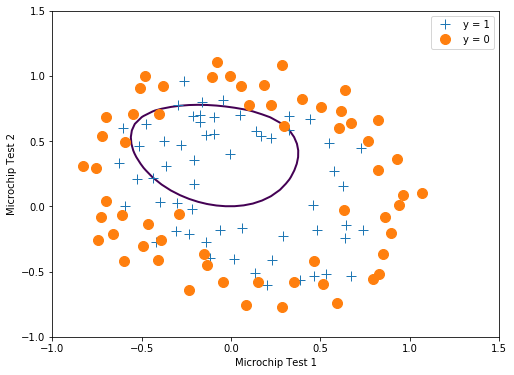

In [707]:
import scipy.optimize as op

# Initialize fitting parameters
initial_theta = np.zeros([X_feat.shape[1], 1])

# Set regularization parameter lambda to 1
lamb = 1

#  Run fminunc to obtain the optimal theta
#  This function will return theta and the cost
results = op.minimize(costFunctionReg, initial_theta, (X_feat, y, lamb), method='TNC', options={
                'maxiter': 400
            }, jac=True)
opt_theta = results.x

# Plot Boundary
plotDecisionBoundary(opt_theta, X_feat, y)

In [703]:
def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    
    m = X.shape[0] # Number of training examples
    p = np.zeros([m, 1])

    p = sigmoid(X @ theta) >= 0.5
    
    return p

In [708]:
# Compute accuracy on our training set
p = predict(opt_theta, X_feat)

print('Train Accuracy: {0}'.format(np.mean(np.double(p == y)) * 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

Train Accuracy: 66.10169491525424
Expected accuracy (with lambda = 1): 83.1 (approx)
